## Import Modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

2024-08-16 15:10:31.908884: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-16 15:10:31.909015: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-16 15:10:32.064281: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Loading the Dataset

In [2]:
train_directory = '/kaggle/input/facial-expression-dataset/train/train/'
test_directory = '/kaggle/input/facial-expression-dataset/test/test/'

In [3]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
    
    return image_paths, labels
#converts folder structure into a CSV

In [4]:
#convert into dataframe / initialize the dataframe
train = pd.DataFrame() #This line initializes an empty Pandas DataFrame named train. A DataFrame is a two-dimensional, tabular data structure that is used to store and manipulate data in Python.
train['image'], train['label'] = load_dataset(train_directory)

#shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
#The frac parameter specifies the fraction of rows to return. A value of 1 means that all rows will be returned, but in a random order (i.e., shuffled).
#After shuffling, the indices of the rows will be out of order. reset_index resets the index of the DataFrame so that the indices are sequential again.
#drop=True: Ensures that the old index is not added as a new column in the DataFrame
train.head()
#This line displays the first few rows of the DataFrame train. The .head() method by default shows the first 5 rows, allowing you to inspect the contents and verify that the data has been loaded and shuffled correctly.

surprise Completed
fear Completed
angry Completed
neutral Completed
sad Completed
disgust Completed
happy Completed


,image,label
0,/kaggle/input/facial-expression-dataset/train/...,angry
1,/kaggle/input/facial-expression-dataset/train/...,sad
2,/kaggle/input/facial-expression-dataset/train/...,angry
3,/kaggle/input/facial-expression-dataset/train/...,angry
4,/kaggle/input/facial-expression-dataset/train/...,neutral


In [5]:
## convert into dataframe
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(test_directory)
test.head()

surprise Completed
fear Completed
angry Completed
neutral Completed
sad Completed
disgust Completed
happy Completed


,image,label
0,/kaggle/input/facial-expression-dataset/test/t...,surprise
1,/kaggle/input/facial-expression-dataset/test/t...,surprise
2,/kaggle/input/facial-expression-dataset/test/t...,surprise
3,/kaggle/input/facial-expression-dataset/test/t...,surprise
4,/kaggle/input/facial-expression-dataset/test/t...,surprise


## Data Analysis

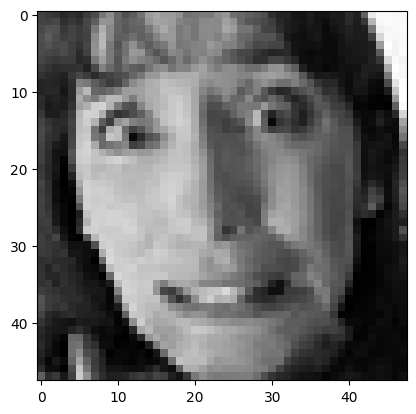

In [6]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

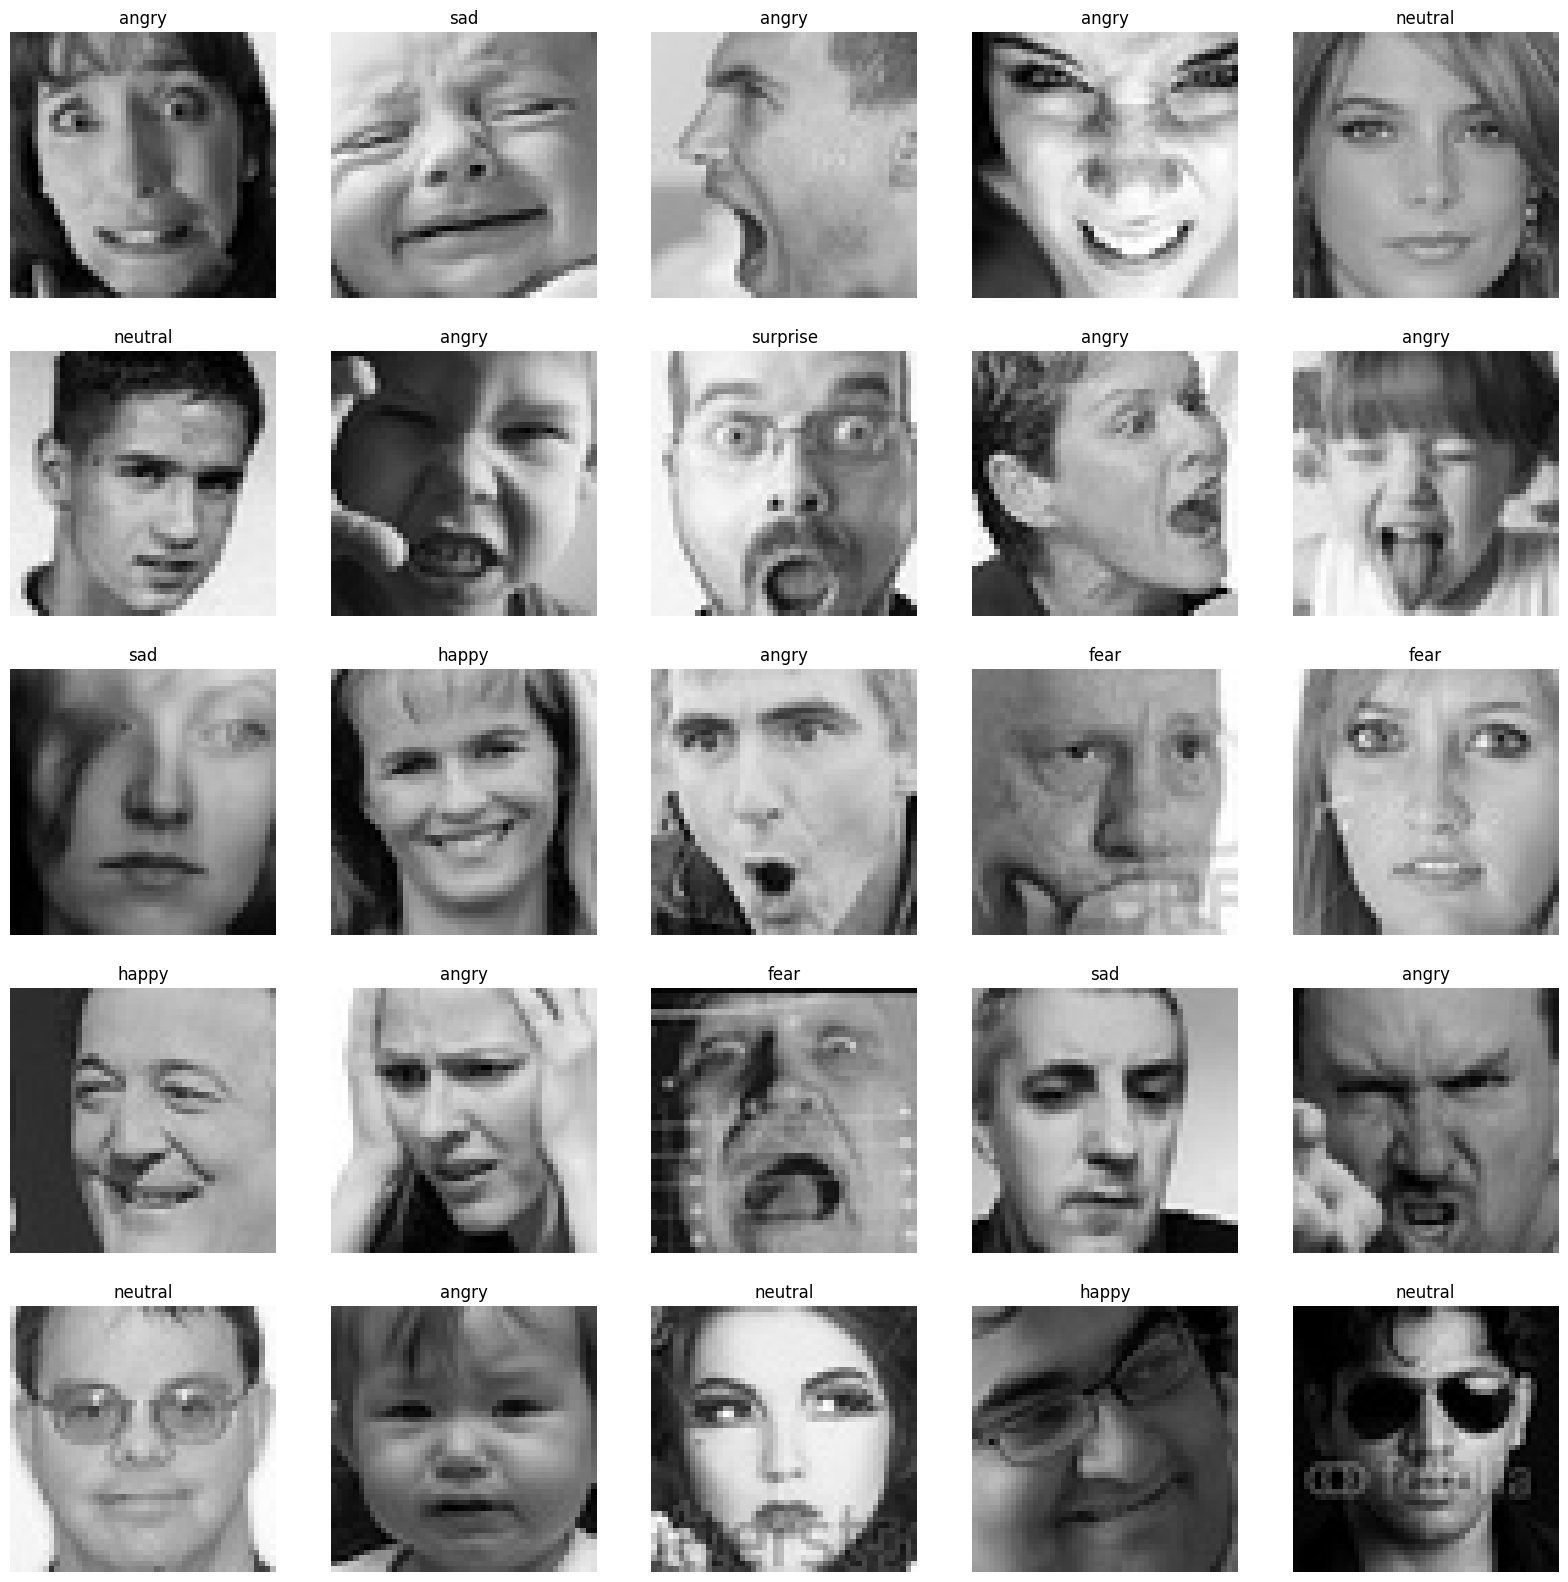

In [7]:
#to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

## Feature Extraction